In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="LSTM seq 2048.", name="epoch 100")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.LSTM(2048, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=100, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2048)              16801792  
                                                                 
 dense (Dense)               (None, 25)                51225     
                                                                 
Total params: 16,853,017
Trainable params: 16,853,017
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 4.5552 - mae: 1.6738

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 10s 2s/step - loss: 4.5552 - mae: 1.6738 - val_loss: 1.1067 - val_mae: 0.9453
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 1.0303 - mae: 0.9015

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 7s 2s/step - loss: 1.0303 - mae: 0.9015 - val_loss: 0.3322 - val_mae: 0.4680
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.2431 - mae: 0.3967

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.2431 - mae: 0.3967 - val_loss: 0.2448 - val_mae: 0.4060
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 0.2264 - mae: 0.3930

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.2264 - mae: 0.3930 - val_loss: 0.1923 - val_mae: 0.3653
Epoch 5/100
5/5 [==============================] - ETA: 0s - loss: 0.1869 - mae: 0.3590

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1869 - mae: 0.3590 - val_loss: 0.1852 - val_mae: 0.3619
Epoch 6/100
5/5 [==============================] - 1s 223ms/step - loss: 0.1908 - mae: 0.3620 - val_loss: 0.1868 - val_mae: 0.3623
Epoch 7/100
5/5 [==============================] - ETA: 0s - loss: 0.1890 - mae: 0.3607

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1890 - mae: 0.3607 - val_loss: 0.1795 - val_mae: 0.3553
Epoch 8/100
5/5 [==============================] - 1s 237ms/step - loss: 0.1806 - mae: 0.3531 - val_loss: 0.1795 - val_mae: 0.3538
Epoch 9/100
5/5 [==============================] - 1s 221ms/step - loss: 0.1803 - mae: 0.3528 - val_loss: 0.1804 - val_mae: 0.3539
Epoch 10/100
5/5 [==============================] - ETA: 0s - loss: 0.1799 - mae: 0.3523

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1799 - mae: 0.3523 - val_loss: 0.1779 - val_mae: 0.3515
Epoch 11/100
5/5 [==============================] - ETA: 0s - loss: 0.1786 - mae: 0.3512

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1786 - mae: 0.3512 - val_loss: 0.1772 - val_mae: 0.3520
Epoch 12/100
5/5 [==============================] - ETA: 0s - loss: 0.1787 - mae: 0.3514

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1787 - mae: 0.3514 - val_loss: 0.1772 - val_mae: 0.3536
Epoch 13/100
5/5 [==============================] - ETA: 0s - loss: 0.1783 - mae: 0.3513

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1783 - mae: 0.3513 - val_loss: 0.1767 - val_mae: 0.3517
Epoch 14/100
5/5 [==============================] - 1s 223ms/step - loss: 0.1784 - mae: 0.3513 - val_loss: 0.1769 - val_mae: 0.3502
Epoch 15/100
5/5 [==============================] - ETA: 0s - loss: 0.1776 - mae: 0.3501

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1776 - mae: 0.3501 - val_loss: 0.1760 - val_mae: 0.3509
Epoch 16/100
5/5 [==============================] - 1s 249ms/step - loss: 0.1769 - mae: 0.3497 - val_loss: 0.1763 - val_mae: 0.3523
Epoch 17/100
5/5 [==============================] - ETA: 0s - loss: 0.1775 - mae: 0.3503

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1775 - mae: 0.3503 - val_loss: 0.1760 - val_mae: 0.3523
Epoch 18/100
5/5 [==============================] - ETA: 0s - loss: 0.1774 - mae: 0.3504

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1774 - mae: 0.3504 - val_loss: 0.1748 - val_mae: 0.3492
Epoch 19/100
5/5 [==============================] - 1s 246ms/step - loss: 0.1769 - mae: 0.3495 - val_loss: 0.1754 - val_mae: 0.3494
Epoch 20/100
5/5 [==============================] - 1s 220ms/step - loss: 0.1774 - mae: 0.3496 - val_loss: 0.1784 - val_mae: 0.3509
Epoch 21/100
5/5 [==============================] - 1s 219ms/step - loss: 0.1770 - mae: 0.3492 - val_loss: 0.1750 - val_mae: 0.3501
Epoch 22/100
5/5 [==============================] - ETA: 0s - loss: 0.1762 - mae: 0.3491

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1762 - mae: 0.3491 - val_loss: 0.1734 - val_mae: 0.3488
Epoch 23/100
5/5 [==============================] - 1s 231ms/step - loss: 0.1764 - mae: 0.3497 - val_loss: 0.1738 - val_mae: 0.3492
Epoch 24/100
5/5 [==============================] - 1s 222ms/step - loss: 0.1748 - mae: 0.3475 - val_loss: 0.1746 - val_mae: 0.3475
Epoch 25/100
5/5 [==============================] - 1s 221ms/step - loss: 0.1763 - mae: 0.3483 - val_loss: 0.1754 - val_mae: 0.3478
Epoch 26/100
5/5 [==============================] - ETA: 0s - loss: 0.1764 - mae: 0.3487

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.5s


5/5 [==============================] - 5s 1s/step - loss: 0.1764 - mae: 0.3487 - val_loss: 0.1721 - val_mae: 0.3465
Epoch 27/100
5/5 [==============================] - 1s 234ms/step - loss: 0.1754 - mae: 0.3475 - val_loss: 0.1731 - val_mae: 0.3460
Epoch 28/100
5/5 [==============================] - 1s 226ms/step - loss: 0.1756 - mae: 0.3479 - val_loss: 0.1726 - val_mae: 0.3487
Epoch 29/100
5/5 [==============================] - 1s 221ms/step - loss: 0.1733 - mae: 0.3461 - val_loss: 0.1723 - val_mae: 0.3452
Epoch 30/100
5/5 [==============================] - 1s 223ms/step - loss: 0.1771 - mae: 0.3484 - val_loss: 0.1735 - val_mae: 0.3462
Epoch 31/100
5/5 [==============================] - 1s 224ms/step - loss: 0.1743 - mae: 0.3455 - val_loss: 0.1745 - val_mae: 0.3509
Epoch 32/100
5/5 [==============================] - ETA: 0s - loss: 0.1748 - mae: 0.3471

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1748 - mae: 0.3471 - val_loss: 0.1697 - val_mae: 0.3433
Epoch 33/100
5/5 [==============================] - 1s 245ms/step - loss: 0.1752 - mae: 0.3469 - val_loss: 0.1726 - val_mae: 0.3456
Epoch 34/100
5/5 [==============================] - 1s 222ms/step - loss: 0.1738 - mae: 0.3449 - val_loss: 0.1731 - val_mae: 0.3496
Epoch 35/100
5/5 [==============================] - ETA: 0s - loss: 0.1726 - mae: 0.3445

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1726 - mae: 0.3445 - val_loss: 0.1693 - val_mae: 0.3414
Epoch 36/100
4/5 [=======================>......] - ETA: 0s - loss: 0.1750 - mae: 0.3461

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1741 - mae: 0.3461 - val_loss: 0.1690 - val_mae: 0.3433
Epoch 37/100
5/5 [==============================] - ETA: 0s - loss: 0.1698 - mae: 0.3418

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1698 - mae: 0.3418 - val_loss: 0.1667 - val_mae: 0.3416
Epoch 38/100
4/5 [=======================>......] - ETA: 0s - loss: 0.1704 - mae: 0.3426

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1678 - mae: 0.3403 - val_loss: 0.1649 - val_mae: 0.3376
Epoch 39/100
5/5 [==============================] - ETA: 0s - loss: 0.1677 - mae: 0.3400

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1677 - mae: 0.3400 - val_loss: 0.1644 - val_mae: 0.3389
Epoch 40/100
5/5 [==============================] - ETA: 0s - loss: 0.1647 - mae: 0.3367

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1647 - mae: 0.3367 - val_loss: 0.1616 - val_mae: 0.3350
Epoch 41/100
5/5 [==============================] - ETA: 0s - loss: 0.1633 - mae: 0.3356

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1633 - mae: 0.3356 - val_loss: 0.1589 - val_mae: 0.3332
Epoch 42/100
5/5 [==============================] - ETA: 0s - loss: 0.1615 - mae: 0.3335

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1615 - mae: 0.3335 - val_loss: 0.1549 - val_mae: 0.3273
Epoch 43/100
4/5 [=======================>......] - ETA: 0s - loss: 0.1572 - mae: 0.3294

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1560 - mae: 0.3281 - val_loss: 0.1494 - val_mae: 0.3234
Epoch 44/100
5/5 [==============================] - 1s 229ms/step - loss: 0.1557 - mae: 0.3284 - val_loss: 0.1580 - val_mae: 0.3332
Epoch 45/100
5/5 [==============================] - 1s 224ms/step - loss: 0.1542 - mae: 0.3260 - val_loss: 0.1693 - val_mae: 0.3426
Epoch 46/100
5/5 [==============================] - ETA: 0s - loss: 0.1484 - mae: 0.3148

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 2s/step - loss: 0.1484 - mae: 0.3148 - val_loss: 0.1384 - val_mae: 0.3117
Epoch 47/100
5/5 [==============================] - ETA: 0s - loss: 0.1319 - mae: 0.3016

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1319 - mae: 0.3016 - val_loss: 0.1376 - val_mae: 0.3109
Epoch 48/100
5/5 [==============================] - ETA: 0s - loss: 0.1339 - mae: 0.3007

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1339 - mae: 0.3007 - val_loss: 0.1141 - val_mae: 0.2755
Epoch 49/100
5/5 [==============================] - 1s 234ms/step - loss: 0.1190 - mae: 0.2798 - val_loss: 0.2484 - val_mae: 0.4044
Epoch 50/100
5/5 [==============================] - 1s 226ms/step - loss: 0.2187 - mae: 0.3810 - val_loss: 0.1579 - val_mae: 0.3301
Epoch 51/100
5/5 [==============================] - 1s 224ms/step - loss: 0.1906 - mae: 0.3536 - val_loss: 0.1478 - val_mae: 0.3225
Epoch 52/100
5/5 [==============================] - 1s 225ms/step - loss: 0.1708 - mae: 0.3399 - val_loss: 0.1839 - val_mae: 0.3508
Epoch 53/100
5/5 [==============================] - 1s 224ms/step - loss: 0.1618 - mae: 0.3325 - val_loss: 0.1619 - val_mae: 0.3366
Epoch 54/100
5/5 [==============================] - 1s 223ms/step - loss: 0.1678 - mae: 0.3386 - val_loss: 0.1553 - val_mae: 0.3314
Epoch 55/100
5/5 [==============================] - 1s 227ms/step - loss: 0.1545 - mae: 0.32

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1213 - mae: 0.2875 - val_loss: 0.1112 - val_mae: 0.2770
Epoch 61/100
5/5 [==============================] - ETA: 0s - loss: 0.1070 - mae: 0.2694

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1070 - mae: 0.2694 - val_loss: 0.0990 - val_mae: 0.2581
Epoch 62/100
5/5 [==============================] - ETA: 0s - loss: 0.0908 - mae: 0.2472

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0908 - mae: 0.2472 - val_loss: 0.0737 - val_mae: 0.2192
Epoch 63/100
5/5 [==============================] - ETA: 0s - loss: 0.0723 - mae: 0.2151

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0723 - mae: 0.2151 - val_loss: 0.0625 - val_mae: 0.1958
Epoch 64/100
5/5 [==============================] - 1s 233ms/step - loss: 0.0831 - mae: 0.2248 - val_loss: 0.1205 - val_mae: 0.2788
Epoch 65/100
5/5 [==============================] - 1s 228ms/step - loss: 0.0952 - mae: 0.2504 - val_loss: 0.0727 - val_mae: 0.2134
Epoch 66/100
5/5 [==============================] - 1s 229ms/step - loss: 0.0792 - mae: 0.2239 - val_loss: 0.0641 - val_mae: 0.1972
Epoch 67/100
5/5 [==============================] - 1s 231ms/step - loss: 0.0689 - mae: 0.2064 - val_loss: 0.0639 - val_mae: 0.1950
Epoch 68/100
5/5 [==============================] - ETA: 0s - loss: 0.0693 - mae: 0.2064

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0693 - mae: 0.2064 - val_loss: 0.0614 - val_mae: 0.1912
Epoch 69/100
5/5 [==============================] - 1s 236ms/step - loss: 0.0611 - mae: 0.1911 - val_loss: 0.0664 - val_mae: 0.2019
Epoch 70/100
5/5 [==============================] - 1s 228ms/step - loss: 0.0655 - mae: 0.2011 - val_loss: 0.0808 - val_mae: 0.2230
Epoch 71/100
5/5 [==============================] - 1s 221ms/step - loss: 0.0684 - mae: 0.2059 - val_loss: 0.0656 - val_mae: 0.2028
Epoch 72/100
5/5 [==============================] - 1s 224ms/step - loss: 0.0771 - mae: 0.2186 - val_loss: 0.0876 - val_mae: 0.2455
Epoch 73/100
5/5 [==============================] - 1s 225ms/step - loss: 0.0775 - mae: 0.2207 - val_loss: 0.0756 - val_mae: 0.2222
Epoch 74/100
5/5 [==============================] - 1s 225ms/step - loss: 0.0730 - mae: 0.2130 - val_loss: 0.0671 - val_mae: 0.2047
Epoch 75/100
5/5 [==============================] - ETA: 0s - loss: 0.0707 - mae: 0.2084

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0707 - mae: 0.2084 - val_loss: 0.0604 - val_mae: 0.1895
Epoch 76/100
5/5 [==============================] - ETA: 0s - loss: 0.0654 - mae: 0.1982

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0654 - mae: 0.1982 - val_loss: 0.0599 - val_mae: 0.1892
Epoch 77/100
5/5 [==============================] - 1s 230ms/step - loss: 0.0641 - mae: 0.1971 - val_loss: 0.0605 - val_mae: 0.1904
Epoch 78/100
5/5 [==============================] - 1s 221ms/step - loss: 0.0656 - mae: 0.2013 - val_loss: 0.0606 - val_mae: 0.1903
Epoch 79/100
5/5 [==============================] - 1s 223ms/step - loss: 0.0648 - mae: 0.1993 - val_loss: 0.0675 - val_mae: 0.2019
Epoch 80/100
5/5 [==============================] - 1s 224ms/step - loss: 0.0631 - mae: 0.1960 - val_loss: 0.0731 - val_mae: 0.2099
Epoch 81/100
5/5 [==============================] - ETA: 0s - loss: 0.0637 - mae: 0.1956

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0637 - mae: 0.1956 - val_loss: 0.0583 - val_mae: 0.1860
Epoch 82/100
5/5 [==============================] - 1s 230ms/step - loss: 0.0611 - mae: 0.1918 - val_loss: 0.0604 - val_mae: 0.1918
Epoch 83/100
5/5 [==============================] - 1s 224ms/step - loss: 0.0634 - mae: 0.1951 - val_loss: 0.0625 - val_mae: 0.1958
Epoch 84/100
5/5 [==============================] - 1s 225ms/step - loss: 0.0611 - mae: 0.1906 - val_loss: 0.0585 - val_mae: 0.1843
Epoch 85/100
5/5 [==============================] - 1s 222ms/step - loss: 0.0593 - mae: 0.1873 - val_loss: 0.0678 - val_mae: 0.2017
Epoch 86/100
5/5 [==============================] - 1s 223ms/step - loss: 0.0615 - mae: 0.1926 - val_loss: 0.0795 - val_mae: 0.2172
Epoch 87/100
5/5 [==============================] - 1s 223ms/step - loss: 0.0653 - mae: 0.1979 - val_loss: 0.0658 - val_mae: 0.1958
Epoch 88/100
5/5 [==============================] - 1s 226ms/step - loss: 0.0633 - mae: 0.19

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.5s


5/5 [==============================] - 6s 1s/step - loss: 0.0612 - mae: 0.1913 - val_loss: 0.0579 - val_mae: 0.1843
Epoch 90/100
5/5 [==============================] - ETA: 0s - loss: 0.0588 - mae: 0.1861

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0588 - mae: 0.1861 - val_loss: 0.0572 - val_mae: 0.1828
Epoch 91/100
5/5 [==============================] - ETA: 0s - loss: 0.0581 - mae: 0.1856

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0581 - mae: 0.1856 - val_loss: 0.0565 - val_mae: 0.1827
Epoch 92/100
5/5 [==============================] - 1s 225ms/step - loss: 0.0603 - mae: 0.1899 - val_loss: 0.0624 - val_mae: 0.1901
Epoch 93/100
5/5 [==============================] - ETA: 0s - loss: 0.0591 - mae: 0.1862

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0591 - mae: 0.1862 - val_loss: 0.0559 - val_mae: 0.1805
Epoch 94/100
5/5 [==============================] - 1s 228ms/step - loss: 0.0583 - mae: 0.1854 - val_loss: 0.0602 - val_mae: 0.1926
Epoch 95/100
5/5 [==============================] - 1s 224ms/step - loss: 0.0591 - mae: 0.1872 - val_loss: 0.0561 - val_mae: 0.1803
Epoch 96/100
5/5 [==============================] - 1s 225ms/step - loss: 0.0611 - mae: 0.1911 - val_loss: 0.0810 - val_mae: 0.2207
Epoch 97/100
5/5 [==============================] - 1s 224ms/step - loss: 0.0672 - mae: 0.2008 - val_loss: 0.0568 - val_mae: 0.1836
Epoch 98/100
5/5 [==============================] - ETA: 0s - loss: 0.0591 - mae: 0.1871

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0591 - mae: 0.1871 - val_loss: 0.0552 - val_mae: 0.1783
Epoch 99/100
5/5 [==============================] - ETA: 0s - loss: 0.0564 - mae: 0.1814

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_163425-18rvz40a\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0564 - mae: 0.1814 - val_loss: 0.0549 - val_mae: 0.1789
Epoch 100/100
5/5 [==============================] - 1s 229ms/step - loss: 0.0577 - mae: 0.1835 - val_loss: 0.0619 - val_mae: 0.1977


In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 211ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.6783986, 1.6500493, 1.6705444, 1.6498973, 1.6579782, 1.7433493,
        1.7513199, 1.7911689, 1.7542428, 1.7595354, 1.7565864, 1.8797827,
        1.7535355, 1.7434433, 1.7724394, 1.7343009, 1.7806046, 1.8886402,
        1.8911232, 1.8501709, 1.8696994, 1.8450835, 1.86844  , 2.0087101,
        1.8607532]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'LSTM prediction')

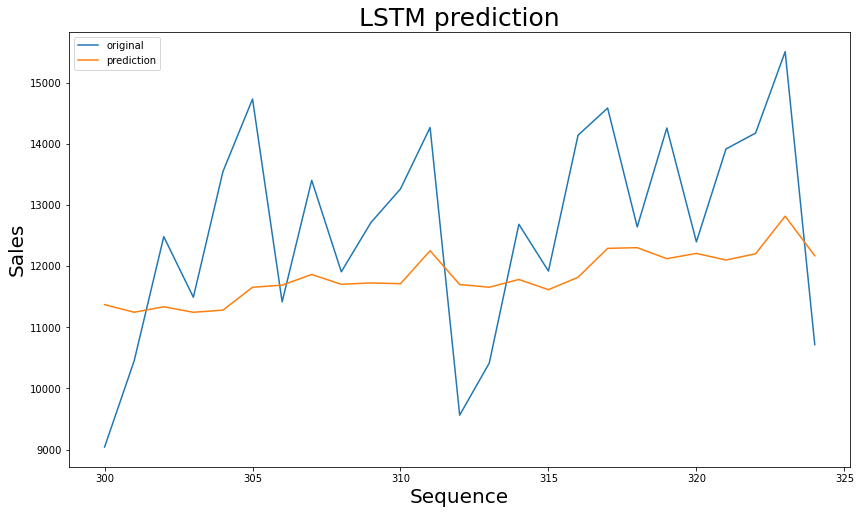

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('LSTM prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 21ms/step - loss: 0.1478 - mae: 0.3309


[0.14781950414180756, 0.3308641016483307]